<a href="https://colab.research.google.com/github/vinayakghatul/Netflix_EDA/blob/main/DV_Netflix_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import basic libraries
Import Data set for Netflix

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

Saving netflix.csv to netflix.csv


Data set basics - Head/Tail etc

In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['netflix.csv']))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
#check basic datatypes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## **Basic Analysis**
1. Un-nesting the columns
2. Handling null values

### Comma separated values in director column

In [6]:
df[df['director'].apply(lambda x: "," in str(x))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",NaN,"September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so..."
68,s69,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",Michael Schumacher,NaN,"September 15, 2021",2021,TV-14,113 min,"Documentaries, International Movies, Sports Mo...",Through exclusive interviews and archival foot...
...,...,...,...,...,...,...,...,...,...,...,...,...
8727,s8728,Movie,When Hari Got Married,"Ritu Sarin, Tenzing Sonam",NaN,"United Kingdom, India, United States","December 25, 2016",2013,NR,75 min,"Documentaries, International Movies",A small-town taxi driver is arranged to be mar...
8728,s8729,Movie,When Two Worlds Collide,"Heidi Brandenburg, Mathew Orzel",NaN,"Peru, United States, United Kingdom","November 30, 2016",2016,TV-14,103 min,"Documentaries, International Movies",This documentary takes a hard look at how indi...
8737,s8738,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,United Kingdom,"February 1, 2019",2016,TV-14,50 min,Documentaries,A Cambridge geneticist dispels misconceptions ...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...


### Un-nesting 'director' column
comma separated values are present in director column hence we will be un-nesting these values using title as index column

In [7]:
# Un-nesting using title and directors
constraint1 = df['director'].apply(lambda x: str(x).split(',')).tolist()
df_new1 = pd.DataFrame(constraint1, index=df['title'])
df_new1 = df_new1.stack()
df_new1 = pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


### Handling comma separated values for 'cast' column

In [8]:
df[df['cast'].apply(lambda x: "," in str(x))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [9]:
# Un-nesting using title and cast
constraint2 = df['cast'].apply(lambda x: str(x).split(',')).to_list()
df_new2 = pd.DataFrame(constraint2, index=df['title'])
df_new2 = df_new2.stack()
df_new2 = pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'], axis=1,inplace=True)
df_new2.head()

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


### Handling nested & comma separated values for 'listed_in' column

In [10]:
# Un-nesting 'listed_in' column using title as index
constraint3 = df['listed_in'].apply(lambda x: str(x).split(',')).to_list()
df_new3 = pd.DataFrame(constraint3, index=df['title'])
df_new3 = df_new3.stack()
df_new3 = pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Genre'},inplace=True)
df_new3.drop(['level_1'],axis=1,inplace=True)
df_new3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


### Handling nested values for 'country' column

In [11]:
constraint4 = df['country'].apply(lambda x: str(x).split(',')).to_list()
df_new4 = pd.DataFrame(constraint4, index=df['title'])
df_new4 = df_new4.stack()
df_new4 = pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'country'},inplace=True)
df_new4.drop(['level_1'],axis=1,inplace=True)
df_new4.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


### Merge un-nested columns on the basic of 'title' with inner join

In [12]:
#using merge in pandas to merge the data frames created in previous step

#mergeing 1 and 2
df_new5 = df_new2.merge(df_new1, on=['title'], how='inner')

#merging 5 and 3
df_new6 = df_new5.merge(df_new3, on=['title'], how='inner')

#mergeing 6 and 4
df_new = df_new6.merge(df_new4, on=['title'], how='inner')

df_new.head()

,title,Actors,Directors,Genre,country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa


### Handling 'nan' values
Replacing nan values for Actors, Directors with 'Unknown Actor' & 'Unknown Director'

In [13]:
#Actors
df_new['Actors'].replace(['nan'],['Unknown Actor'], inplace=True)
#Directors
df_new['Directors'].replace(['nan'],['Unknown Director'], inplace=True)
#Country
df_new['country'].replace(['nan'],[np.nan],inplace=True)

df_new.head()

,title,Actors,Directors,Genre,country
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa


In [14]:
#merging our unnested data with the original data
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


### Handling Null Values


In [15]:
#count of null values
df_final.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

Duration values (3) which are null are present in rating columns as minutes from the observation which should be present in the duration column hence moving them back as follows

In [16]:
df_final[df_final['duration'].isnull()]

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,NaN
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,NaN
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,NaN


In [17]:
df_final.loc[df_final['duration'].isnull(), 'duration']  = df_final.loc[df_final['duration'].isnull(), 'duration'].fillna(df_final['rating'])


In [18]:
#ratings which had false values with minutes need to be updated with 'NR' - Not Rated
df_final.loc[df_final['rating'].str.contains('min', na=False), 'rating'] = 'NR'
df_final['rating'].fillna('NR', inplace=True)


In [19]:
df_final.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [20]:
pd.set_option('display.max_rows',None)

### Handle NaN values for 'date_added' column

In [21]:
df_final[df_final['date_added'].isnull()].head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
136940,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136941,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136942,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136943,A Young Doctor's Notebook and Other Stories,Jon Hamm,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136944,A Young Doctor's Notebook and Other Stories,Jon Hamm,Unknown Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons


Imputation for 'date_added' with relevant value by referencing release_year column
Steps:
1. Calculate the mode for corresponding release year
2. If 'date_added' is 'NaN' then using release year fetch mode value and replace it in 'date_added' column

In [22]:
for year in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  imp = df_final[df_final['release_year']==year]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year'] == year, 'date_added'] = df_final.loc[df_final['release_year'] == year,'date_added'].fillna(imp)


### Imputation for Country on the basic of Directors/Actors
For certain title of 'country' value is missing then it can be imputed with it's director's mode value in one iteration and it's actor's mode value in the second iteration.
Remaining unknown values can be replaced with 'Unknown Country'

In [23]:
for director in df_final[df_final['country'].isnull()]['Directors'].unique():
  if director in df_final[~df_final['country'].isnull()]['Directors'].unique():
    imp = df_final[df_final['Directors']==director]['country'].mode().values[0]
    df_final.loc[df_final['Directors']==director, 'country'] = df_final.loc[df_final['Directors']==director, 'country'].fillna(imp)

In [24]:
len(df_final[df_final['country'].isnull()])

4673

Still there is significant number of null values even after using 'Directors' column for imputation.
We will use 'Actors' column for further reducing this count.

In [25]:
for actor in df_final[df_final['country'].isnull()]['Actors'].unique():
  if actor in df_final[~df_final['country'].isnull()]['Actors'].unique():
    imp = df_final[df_final['Actors']==actor]['country'].mode().values[0]
    df_final.loc[df_final['Actors']==actor,'country'] = df_final.loc[df_final['Actors']==actor,'country'].fillna(imp)

In [26]:
len(df_final[df_final['country'].isnull()])

2455

Still there are 2455 rows with country value as 'NaN'.
These values can be replaced with 'Unknown Country'

In [27]:
df_final['country'].fillna('Unknown Country', inplace=True)
len(df_final[df_final['country'].isnull()])

0

In [28]:
#Final null values tally for the dataset
df_final.isnull().sum()

title           0
Actors          0
Directors       0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [29]:
df_final.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


# Answering the questions asked in the case


### 'Duration' analysis
first we need to get rid of 'min' and 'seasons' in 'duration'.
then plot them in range to get insights on duration

In [30]:
df_final['duration'].value_counts()

1 Season      35035
2 Seasons      9559
3 Seasons      5084
94 min         4343
106 min        4040
97 min         3624
95 min         3560
96 min         3511
93 min         3480
90 min         3305
105 min        3209
107 min        3103
101 min        3048
102 min        3017
103 min        2985
98 min         2984
99 min         2956
91 min         2915
92 min         2863
104 min        2822
88 min         2781
110 min        2711
100 min        2699
108 min        2614
112 min        2594
85 min         2486
89 min         2420
86 min         2213
4 Seasons      2134
116 min        2122
118 min        2119
87 min         2089
119 min        2075
109 min        2020
113 min        1990
120 min        1845
117 min        1770
121 min        1728
5 Seasons      1698
111 min        1667
124 min        1590
114 min        1529
127 min        1505
115 min        1444
123 min        1398
125 min        1299
122 min        1298
84 min         1268
128 min        1241
130 min        1216


In [31]:
#remove mins
df_final['duration'] = df_final['duration'].str.replace(" min","")
df_final.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [32]:
#Modify seasons string
df_final['duration_copy'] = df_final['duration'].copy()
df_final1 = df_final.copy()

In [33]:
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy']=df_final1['duration_copy'].astype('int')
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [34]:
df_final1['duration_copy'].describe()

count    202065.000000
mean         77.152065
std          52.262613
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

### Lets analyse 'duration' using graph

<Axes: xlabel='duration_copy', ylabel='Count'>

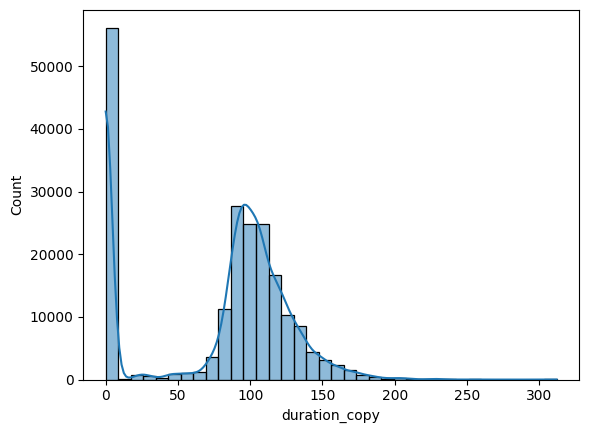

In [35]:
#histogram for duration analysis
import seaborn as sns
sns.histplot(df_final1['duration_copy'], kde=True,bins=int(36))

In [36]:
#converting duration values to duration ranges in 'duration_copy' column
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final1['duration_copy'] = pd.cut(df_final1['duration_copy'],bins=bins1,labels=labels1)


In [37]:
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1


Now we have converted numerical values of duration to range labels, we will move these to original duration column keeping season values as it is.

In [38]:
df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration'] = df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration_copy']
df_final1.drop(['duration_copy'],axis=1,inplace=True)
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [39]:
df_final1['duration'].value_counts()

80-100        52992
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7701
150-200        6737
3 Seasons      5084
1-50           2548
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: duration, dtype: int64

We need to split 'date_added' as well into month and week for further analysis as follows:

In [40]:
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in df_final1['date_added'].values:
  dt1=parse(i)
  arr.append(dt1.strftime('%Y-%m-%d'))
df_final1['Modified_Added_date'] =arr
df_final1['Modified_Added_date']=pd.to_datetime(df_final1['Modified_Added_date'])
df_final1['month_added']=df_final1['Modified_Added_date'].dt.month
df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week
df_final1['year']=df_final1['Modified_Added_date'].dt.year
df_final1.head()

<ipython-input-40-40a4d87f541c>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week


,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


### Categorical analysis of each variable/column (graphical & non-graphical)

### Genre Analysis

In [41]:

df_final1.groupby(['Genre']).agg({"title":"nunique"})

,title
Genre,
Anime Features,50
Children & Family Movies,36
Classic & Cult TV,6
Classic Movies,36
Comedies,464
Crime TV Shows,71
Cult Movies,59
Documentaries,40
Docuseries,174


Plot for 'Genre' to understand top 10 and most famous genres

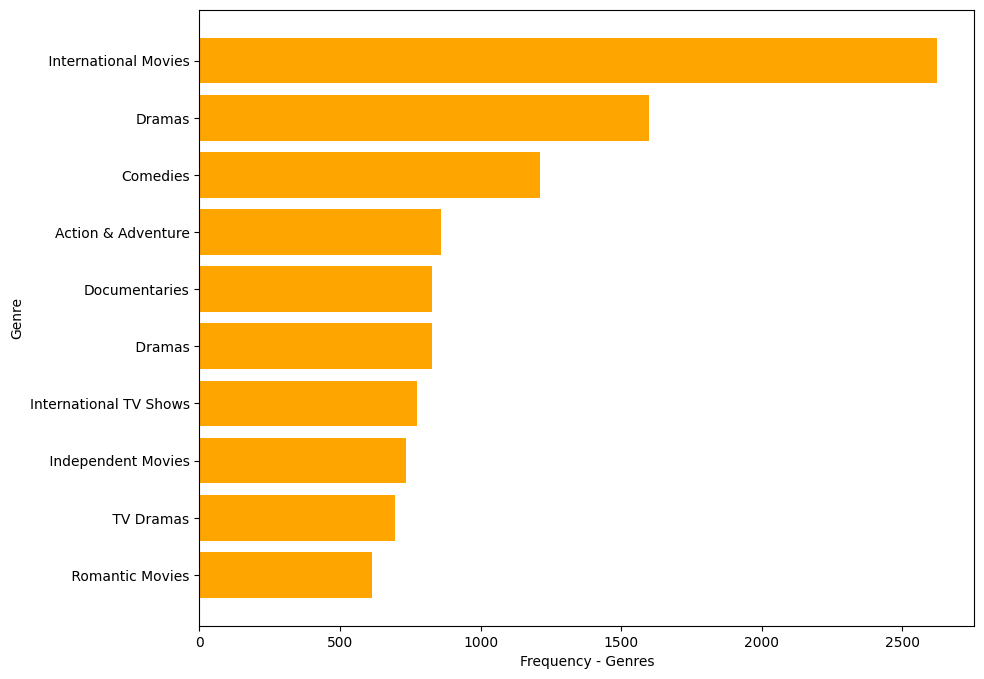

In [42]:
df_genre = df_final1.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(10,8))
plt.barh(df_genre[::-1]['Genre'],df_genre[::-1]['title'],color='orange')
plt.xlabel('Frequency - Genres')
plt.ylabel('Genre')
plt.show()

From above plot it can be clearly seen the list of top 10 Genres.
'International Movies','Dramas' and 'Comedies' are most popular Genres throughout.

### Type Analysis - TV shows vs Movies

In [43]:
df_final1.groupby(['type']).agg({"title":"nunique"})

,title
type,
Movie,6131
TV Show,2676


Adding pie-chart for this

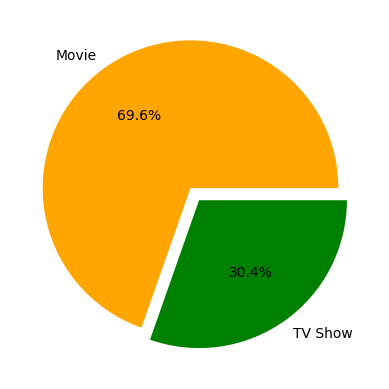

In [44]:
df_type = df_final.groupby(['type']).agg({"title":"nunique"}).reset_index()
plt.pie(df_type['title'],explode=(0.05,0.05),labels=df_type['type'],colors=['orange','green'],autopct='%.1f%%')
plt.show()

Observation: We have 70:30 ratio for Movie: TV Show in our dataset

### Country Analysis

In [45]:
df_final1.groupby(['country']).agg({"title":"nunique"})

,title
country,
,8
Afghanistan,1
Albania,1
Algeria,3
Angola,1
Argentina,17
Armenia,1
Australia,44
Austria,4


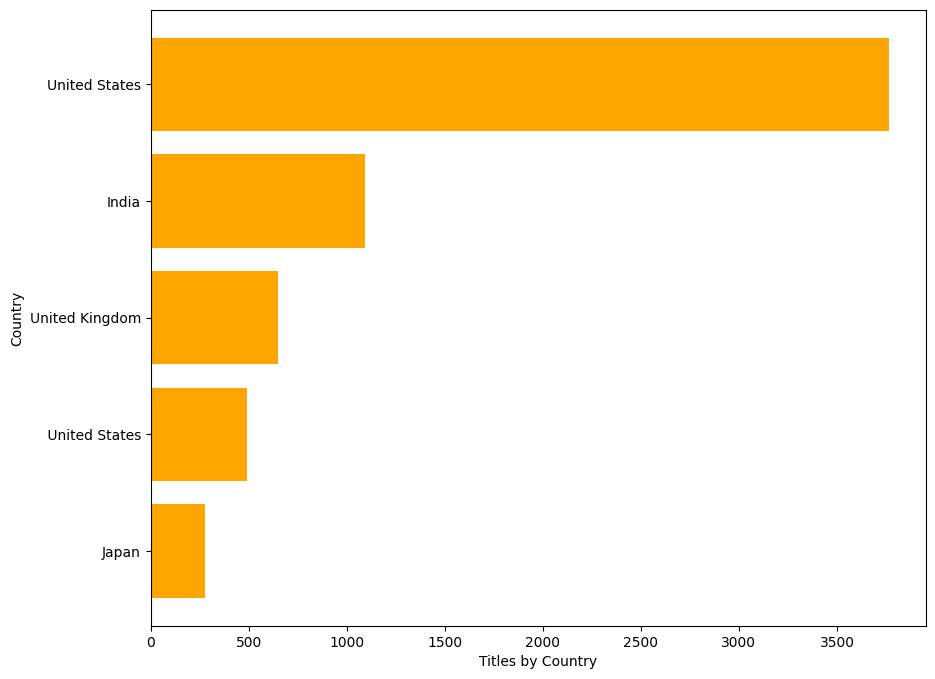

In [46]:
df_country = df_final1.groupby('country').agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(10,8))
plt.barh(df_country[::-1]['country'],df_country[::-1]['title'],color=['orange'])
plt.xlabel('Titles by Country')
plt.ylabel('Country')
plt.show()

United States is leading in content creation on netflix followed by India, United Kingdom, Japan etc

### Rating Analysis

In [47]:
df_final1.groupby(['rating']).agg({"title":"nunique"})

,title
rating,
G,41
NC-17,3
NR,87
PG,287
PG-13,490
R,799
TV-14,2160
TV-G,220
TV-MA,3207


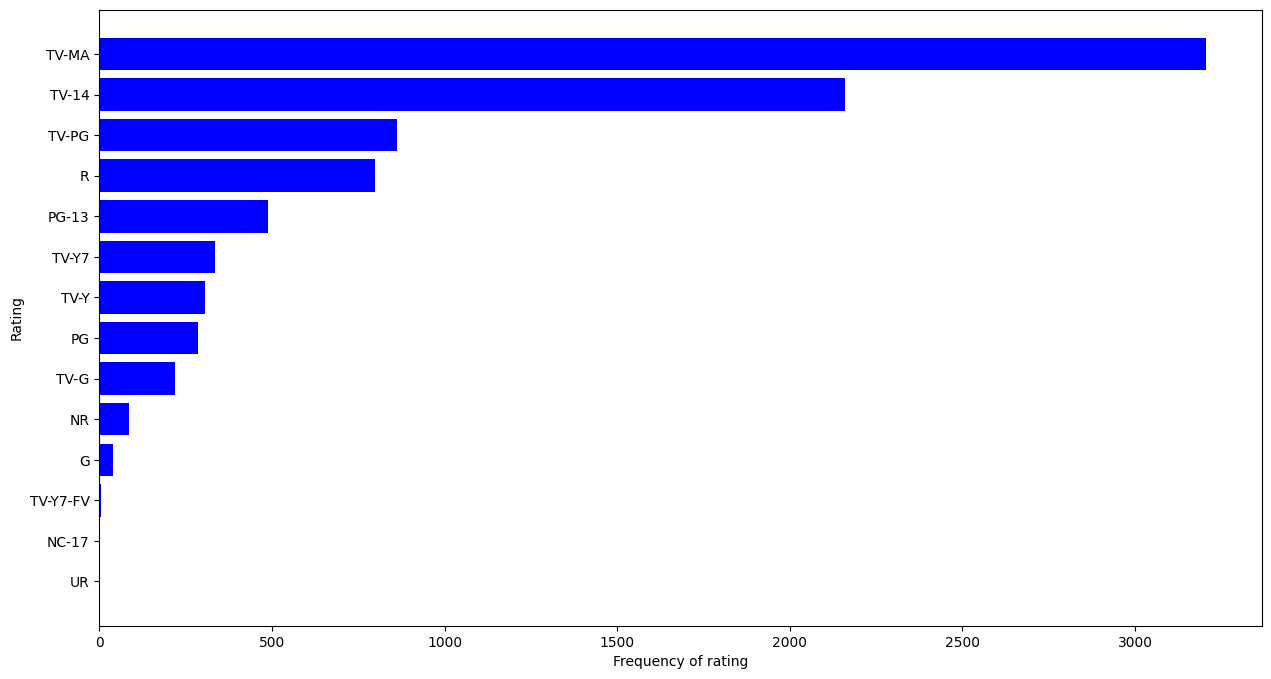

In [50]:
df_rating=df_final1.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'],df_rating[::-1]['title'],color=['blue'])
plt.xlabel('Frequency of rating')
plt.ylabel('Rating')
plt.show()

Highest rated content is 'TV-MA' i.e. for mature audience followed by Above 14 and Parental Guidance content.

### Duration Analysis

In [52]:
df_final1.groupby('duration').agg({"title":"nunique"}).sort_values(by=['title'],ascending=False)

,title
duration,
80-100,2222
1 Season,1793
100-120,1672
120-150,897
50-80,808
2 Seasons,425
1-50,287
150-200,226
3 Seasons,199


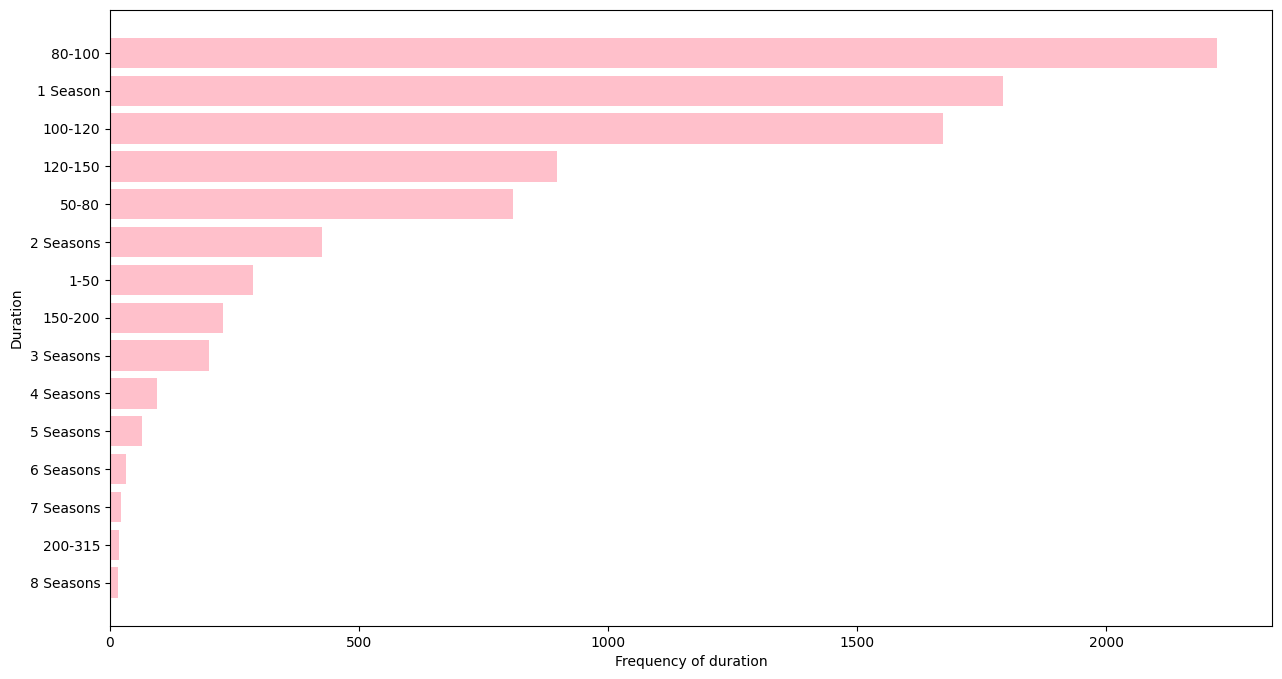

In [55]:
df_duration = df_final1.groupby('duration').agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'],df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency of duration')
plt.ylabel('Duration')
plt.show()

For movies: Duration of 80-100 and 100-120 are most commons.
For TV Shows: Most frequent duration is season 1 followed by season 2

### Actors & Directors Analysis

In [66]:
df_actor = df_final1.groupby('Actors').agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
df_actor

,Actors,title
38982,Unknown Actor,825
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27
25410,Rajesh Kava,26
38445,Shah Rukh Khan,26
4186,Boman Irani,25
23956,Paresh Rawal,25


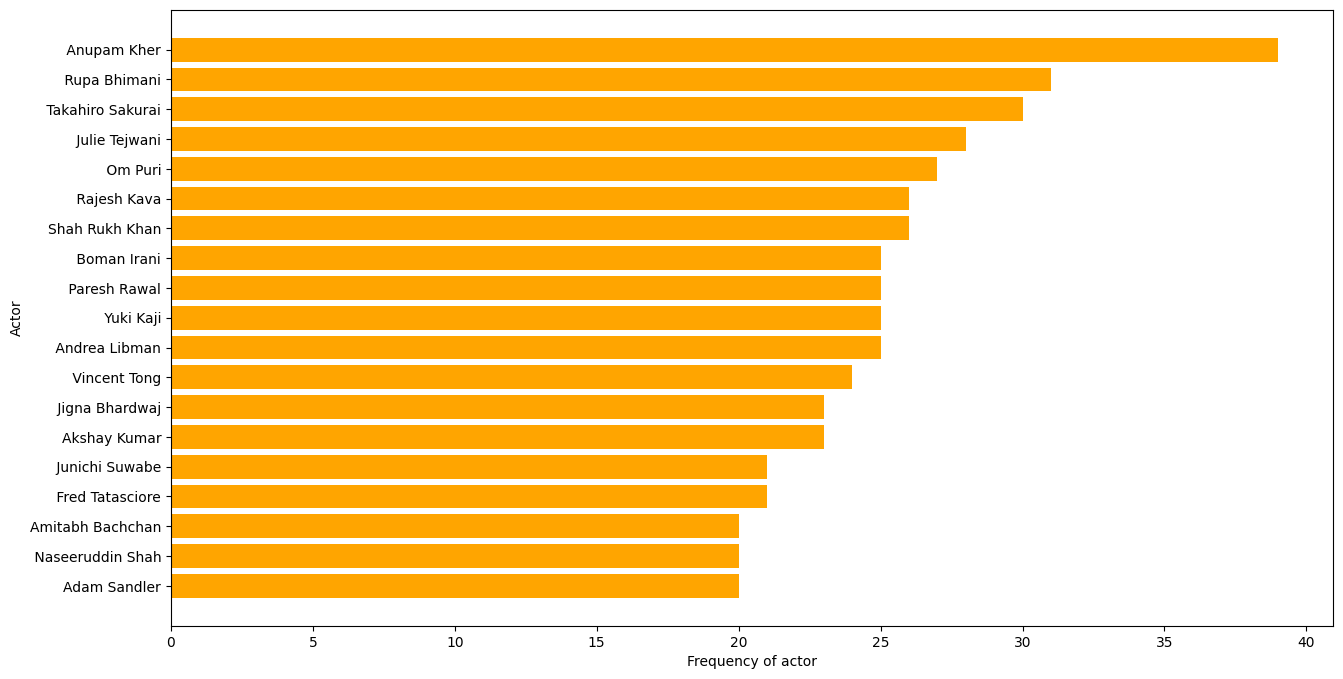

In [67]:
df_actor=df_actor[df_actor['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actor[::-1]['Actors'],df_actor[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of actor')
plt.ylabel('Actor')
plt.show()

Anupam Kher is the most frequently occured actor followed by Rupa Bhimani,Takahiro Sakurai and Julie Tejwani.

In [73]:
df_director = df_final1.groupby('Directors').agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
df_director = df_director[df_director['Directors']!='Unknown Director']
df_director

,Directors,title
4020,Rajiv Chilaka,22
261,Jan Suter,18
4067,Raúl Campos,18
3235,Marcus Raboy,16
4651,Suhas Kadav,16
2450,Jay Karas,15
1382,Cathy Garcia-Molina,13
2447,Jay Chapman,12
3306,Martin Scorsese,12
5075,Youssef Chahine,12


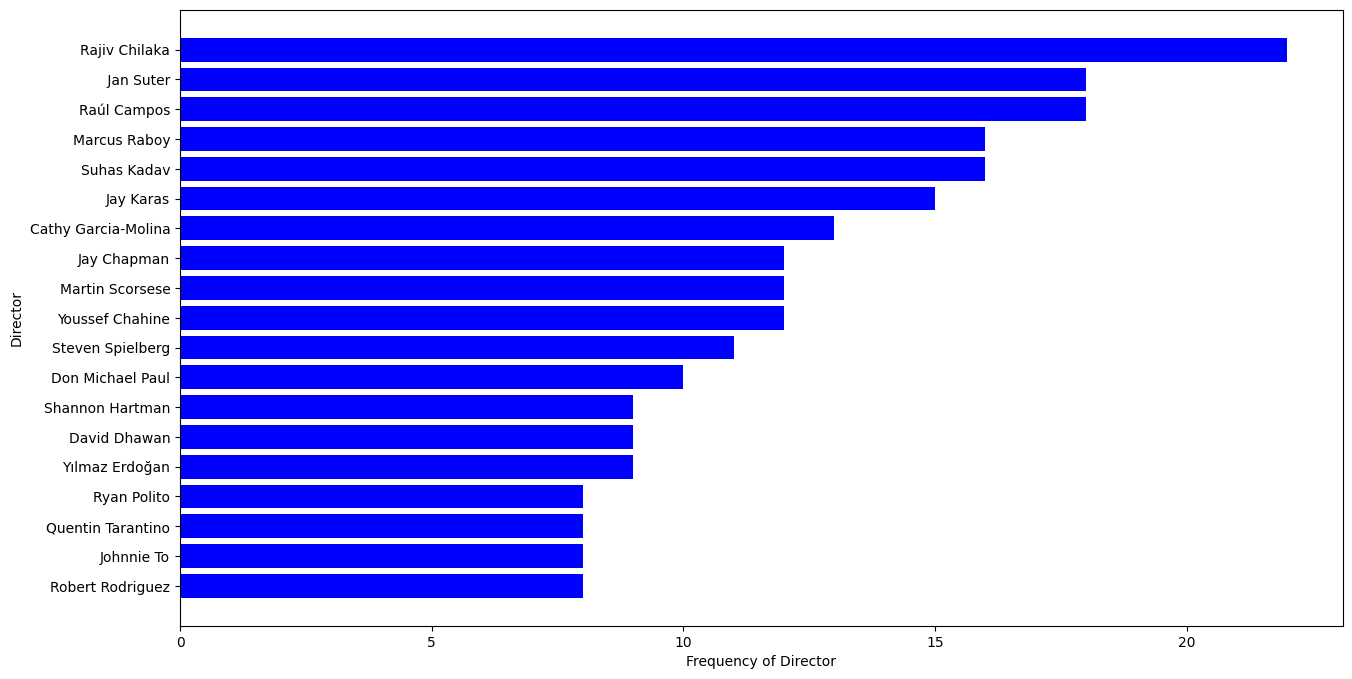

In [75]:
plt.figure(figsize=(15,8))
plt.barh(df_director[::-1]['Directors'],df_director[::-1]['title'],color=['blue'])
plt.xlabel('Frequency of Director')
plt.ylabel('Director')
plt.show()

It can be seen that Rajiv Chilaka,Jan Suter and Raul Campos are top 3 popular directors

### 'Year' Analysis

In [82]:
df_year = df_final1.groupby('year').agg({"title":"nunique"}).reset_index()
df_year

,year,title
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,432
9,2017,1189


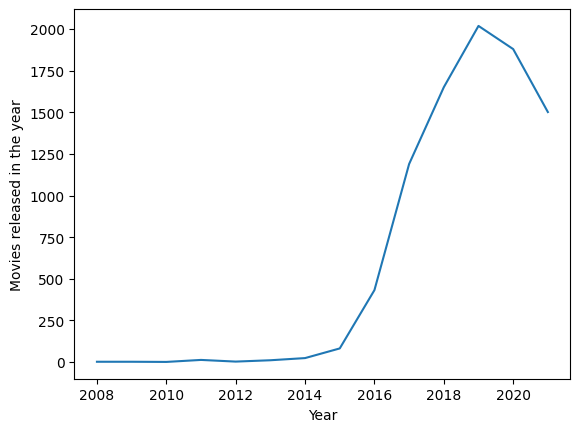

In [83]:
sns.lineplot(data=df_year,x='year',y='title')
plt.xlabel('Year')
plt.ylabel('Movies released in the year')
plt.show()

From above plot its clear that,from 2008 to 2014 there was minor increament in the content but from 2014 to 2019 there was exponential growth in the content which declined from 2020 probably due to covid

### Week and Month Analysis for Movies & TV Shows

In [84]:
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [86]:
df_week = df_final1.groupby('week_Added').agg({"title":"nunique"}).reset_index()
df_week

,week_Added,title
0,1,372
1,2,108
2,3,113
3,4,88
4,5,208
5,6,97
6,7,147
7,8,110
8,9,254
9,10,135


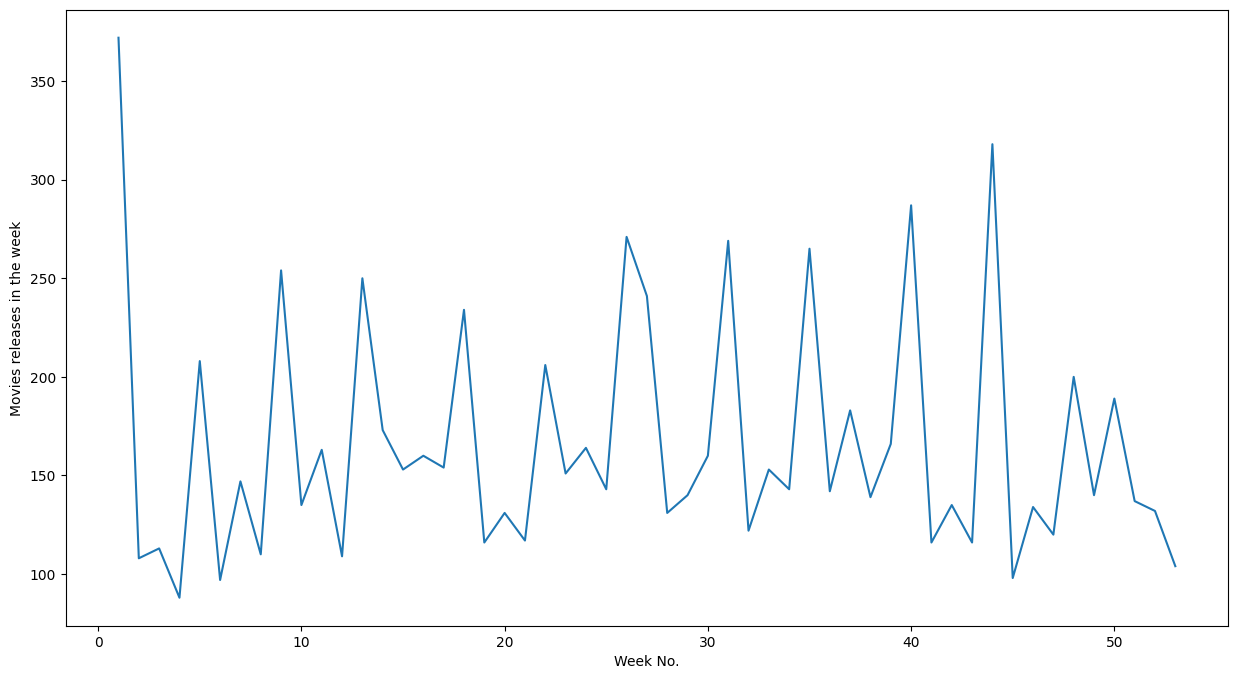

In [89]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week,x='week_Added',y='title')
plt.xlabel('Week No.')
plt.ylabel('Movies releases in the week')
plt.show()

First week of the year has highest number of releases compared to remaining weeks

In [90]:
df_month = df_final1.groupby('month_added').agg({"title":"nunique"}).reset_index()
df_month

,month_added,title
0,1,738
1,2,563
2,3,742
3,4,765
4,5,632
5,6,728
6,7,832
7,8,756
8,9,772
9,10,760


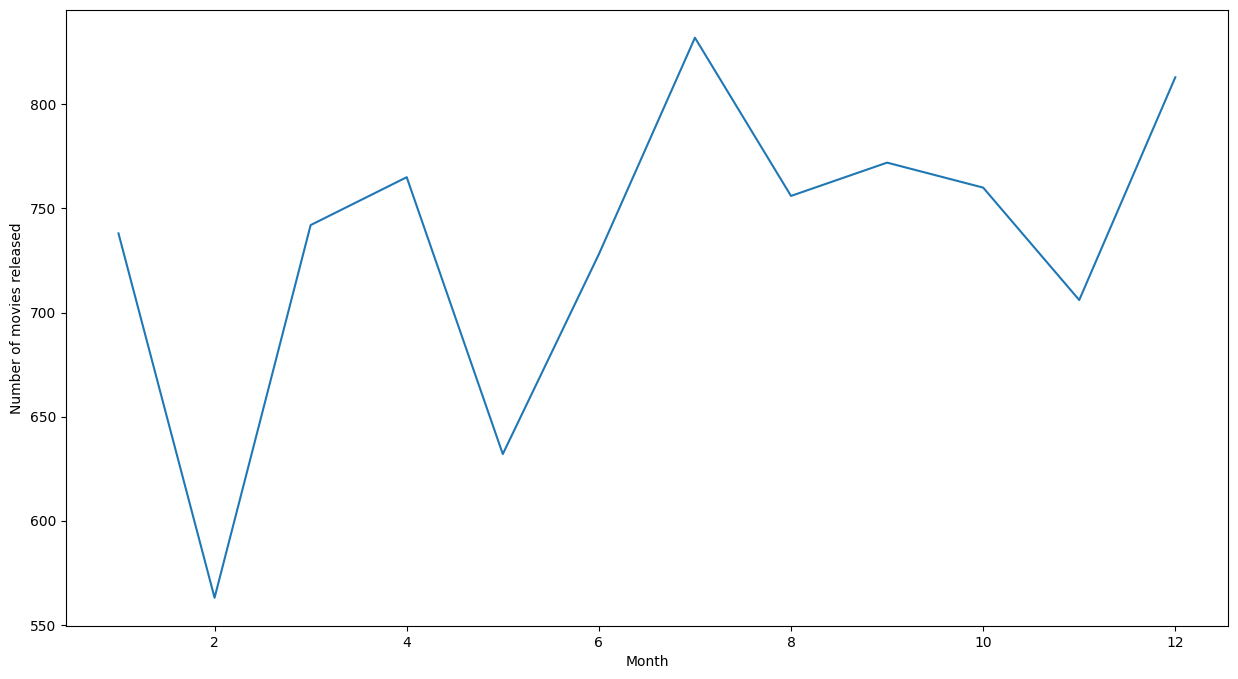

In [91]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df_month,x='month_added',y='title')
plt.xlabel('Month')
plt.ylabel('Number of movies released')
plt.show()

In 1,7,12 these 3 months maximum content is added.

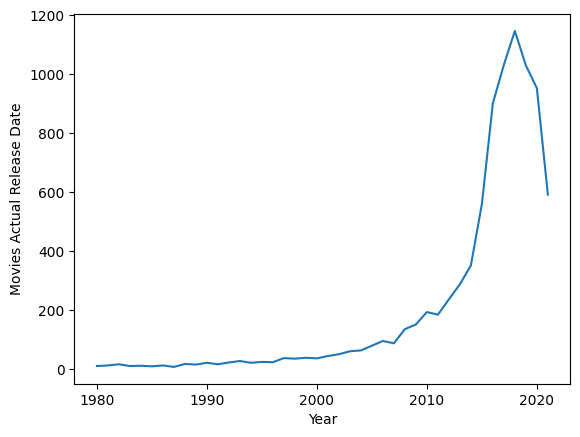

In [92]:
df_release_year=df_final1[df_final1['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()